# Holiday Package Prediction Dataset

### Problem Statement

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the travel dataset
df=pd.read_csv("Travel.csv")

In [9]:
# Display the first few rows of the dataset
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
# Show data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [11]:
# Show number of rows and columns
df.shape

(4888, 20)

## Handling Missing Values

In [13]:
# Check for missing values in each column
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [14]:
# Display value counts for this categorical column
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [15]:
# Display value counts for this categorical column
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [16]:
# Display value counts for this categorical column
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [17]:
# Display value counts for this categorical column
df["Occupation"].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [18]:
# Display value counts for this categorical column
df["ProductPitched"].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [19]:
# Display value counts for this categorical column
df["Designation"].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [20]:
# Standardize categorical values (e.g., fix typos)
df['Gender']= df['Gender'].replace('Fe Male','Female')
# Standardize categorical values (e.g., fix typos)
df['MaritalStatus']= df['MaritalStatus'].replace('Unmarried','Single')

In [21]:
# Display value counts for this categorical column
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [22]:
# Display value counts for this categorical column
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [23]:
# Check for missing values in each column
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
# Identify features with missing values
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5))

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [24]:
# Describe statistics of features with missing values
df[features_with_na].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [25]:
# Display unique values in the column
df['NumberOfChildrenVisiting'].unique()

array([ 0.,  2.,  1., nan,  3.])

In [26]:
# Display unique values in the column
df['PreferredPropertyStar'].unique()

array([ 3.,  4.,  5., nan])

In [27]:
# Display unique values in the column
df['NumberOfFollowups'].unique()

array([ 3.,  4.,  2.,  5., nan,  1.,  6.])

In [28]:
# Fill missing values with median or mode
df["Age"] = df["Age"].fillna(df["Age"].median())
# Fill missing values with median or mode
df["TypeofContact"] = df["TypeofContact"].fillna(df["TypeofContact"].mode()[0])
# Fill missing values with median or mode
df["DurationOfPitch"] = df["DurationOfPitch"].fillna(df["DurationOfPitch"].median())
# Fill missing values with median or mode
df["NumberOfFollowups"] = df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].median())
# Fill missing values with median or mode
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0])
# Fill missing values with median or mode
df["NumberOfTrips"] = df["NumberOfTrips"].fillna(df["NumberOfTrips"].median())
# Fill missing values with median or mode
df["NumberOfChildrenVisiting"] = df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0])
# Fill missing values with median or mode
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())


In [29]:
# Check for missing values in each column
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [30]:
# Display value counts for this categorical column
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64

In [31]:
df['NumberOfChildrenVisiting'].mode()[0]

1.0

In [32]:
df.drop("CustomerID",inplace=True,axis=1)

In [33]:
# Display the first few rows of the dataset
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering

### Feature Extraction

In [36]:
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'])

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Single,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [37]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
for feature in numeric_features:
    print(feature)

print("Total :",len(numeric_features))

ProdTaken
Age
CityTier
DurationOfPitch
NumberOfPersonVisiting
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
NumberOfChildrenVisiting
MonthlyIncome
TotalVisiting
Total : 14


In [38]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
for feature in categorical_feature:
    print(feature)

print("Total :",len(categorical_feature))

TypeofContact
Occupation
Gender
ProductPitched
MaritalStatus
Designation
Total : 6


In [39]:
# Display unique values in the column
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]
for feature in discrete_features:
    print(feature)

print("Total :",len(discrete_features))

ProdTaken
CityTier
NumberOfPersonVisiting
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
NumberOfChildrenVisiting
TotalVisiting
Total : 11


In [40]:
continuous_features=[feature for feature in numeric_features if feature not in discrete_features]
for feature in continuous_features:
    print(feature)

print("Total :",len(continuous_features))

Age
DurationOfPitch
MonthlyIncome
Total : 3


## Train Test Split and Model Training

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [44]:
# Display value counts for this categorical column
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [45]:
# Display the first few rows of the dataset
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [46]:
# Show number of rows and columns
X.shape

(4888, 19)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
# Show number of rows and columns
X_train.shape

(3910, 19)

In [49]:
# Show number of rows and columns
X_test.shape

(978, 19)

In [50]:
#Create column transformer with 3 types of transformers

cat_features=X.select_dtypes(include="object").columns
num_features=X.select_dtypes(exclude="object").columns

In [51]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [52]:
ohe=OneHotEncoder(drop='first')
ss=StandardScaler()

In [53]:
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",ohe,cat_features),
        ("StandardScaler",ss,num_features)
    ]
)

In [54]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [55]:
X_train=preprocessor.fit_transform(X_train)

In [56]:
X_test=preprocessor.transform(X_test)

In [57]:
# Display the first few rows of the dataset
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.263809,-0.713603,0.530883,0.434216,-0.644305,0.678514,0.784667,-1.407958,-0.226963,-1.496955
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.114956,0.293685,-0.727912,-0.681646,-0.644305,-1.518275,0.784667,-0.231903,0.369702,-0.080598
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.114956,0.293685,0.530883,-0.681646,-0.644305,1.410777,0.784667,0.944153,-0.265800,0.627580
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.493721,-1.720892,-0.727912,-0.681646,-0.644305,-0.053749,0.784667,2.120209,0.010892,2.043937
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.493721,1.300974,1.789679,0.434216,1.552061,1.410777,0.784667,2.120209,0.973903,2.043937


## Model 

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_auc_score

In [60]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "K Nearest Neighbors": KNeighborsClassifier()
}

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)  # Train Model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1_score = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1_score = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    # Output
    print(f"\n{model_name}")
    print("Model Performance for Training Set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_roc_auc_score))

    print("-------------------------------------")

    print("Model Performance for Test Set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_roc_auc_score))
    
    print("---------------------------------------")



Random Forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------
Model Performance for Test Set
- Accuracy: 0.9254
- F1 Score: 0.7286
- Precision: 0.9074
- Recall: 0.6087
- ROC AUC Score: 0.7982
---------------------------------------

Decision Trees
Model Performance for Training Set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------
Model Performance for Test Set
- Accuracy: 0.9018
- F1 Score: 0.7225
- Precision: 0.6757
- Recall: 0.7764
- ROC AUC Score: 0.8515
---------------------------------------

Logistic Regression
Model Performance for Training Set
- Accuracy: 0.8465
- F1 Score: 0.4700
- Precision: 0.7131
- Recall: 0.3505
- ROC AUC Score: 0.6583
-------------------------------------
Model Performance for Test Set
- Accuracy: 0.8517
- F1 Score: 0.4130
- Precision: 0.5930
- R

### Clearly Random Forest And Decision Trees are the 2 best performimg models
### Let's try Hyperparameter Tuning For These two using RandomSearchCV

In [73]:
param_grid_rf = {
    'n_estimators': [50,100, 200, 300,500],
    'max_depth': [None,5, 10, 20, 30],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


In [75]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}


In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid_rf,
    cv=5,  
    scoring='accuracy', 
    n_jobs=-1,  
    verbose=1, 
    return_train_score=True
)


In [110]:
random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

In [112]:
print("Fitting Random Forest RandomizedSearchCV...")
random_search_rf.fit(X_train, y_train)


Fitting Random Forest RandomizedSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [113]:
print("Fitting Decision Tree RandomizedSearchCV...")
random_search_dt.fit(X_train, y_train)


Fitting Decision Tree RandomizedSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [114]:
print("\n=== RANDOM FOREST RESULTS ===")
print("Best parameters:", random_search_rf.best_params_)
print("Best cross-validation score:", random_search_rf.best_score_)

print("\n=== DECISION TREE RESULTS ===")
print("Best parameters:", random_search_dt.best_params_)
print("Best cross-validation score:", random_search_dt.best_score_) 


=== RANDOM FOREST RESULTS ===
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
Best cross-validation score: 0.9033248081841432

=== DECISION TREE RESULTS ===
Best parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
Best cross-validation score: 0.8884910485933505


In [118]:

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='log2',
        max_depth=None,
        criterion='entropy'
    )
}

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)  # Train Model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1_score = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1_score = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    # Output
    print(f"\n{model_name}")
    print("Model Performance for Training Set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_roc_auc_score))

    print("-------------------------------------")

    print("Model Performance for Test Set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_roc_auc_score))
    
    print("---------------------------------------")



Random Forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------
Model Performance for Test Set
- Accuracy: 0.9223
- F1 Score: 0.7077
- Precision: 0.9293
- Recall: 0.5714
- ROC AUC Score: 0.7814
---------------------------------------


In [120]:

models = {
    "Decision Tree":DecisionTreeClassifier(
        splitter='best',
        min_samples_split= 2,
        min_samples_leaf=1,
        max_features= None, 
        max_depth= 30,
        criterion= 'gini'
    )
}

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)  # Train Model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1_score = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1_score = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    # Output
    print(f"\n{model_name}")
    print("Model Performance for Training Set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_roc_auc_score))

    print("-------------------------------------")

    print("Model Performance for Test Set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_roc_auc_score))
    
    print("---------------------------------------")



Decision Tree
Model Performance for Training Set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------
Model Performance for Test Set
- Accuracy: 0.9100
- F1 Score: 0.7412
- Precision: 0.7039
- Recall: 0.7826
- ROC AUC Score: 0.8589
---------------------------------------


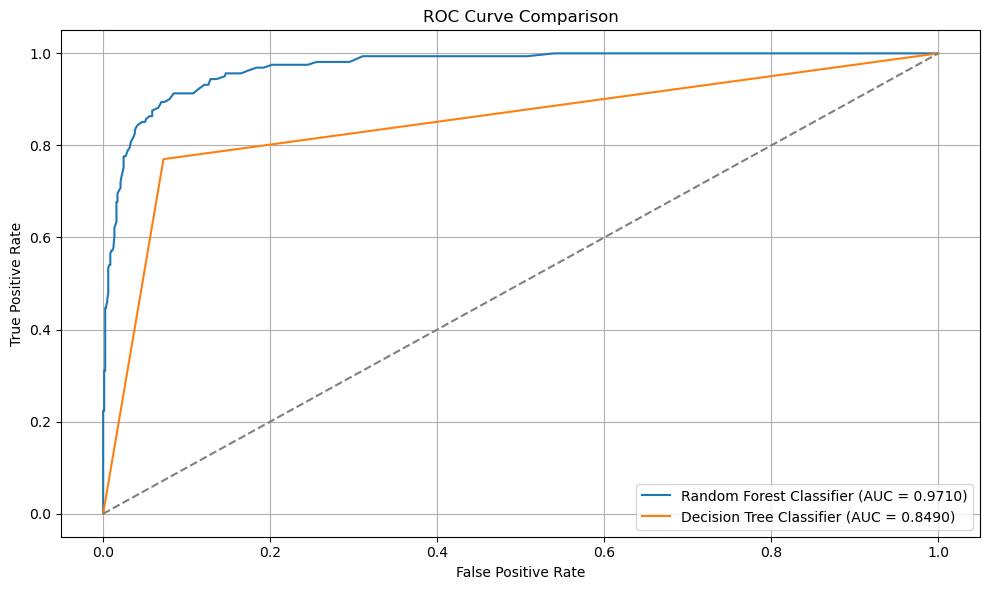

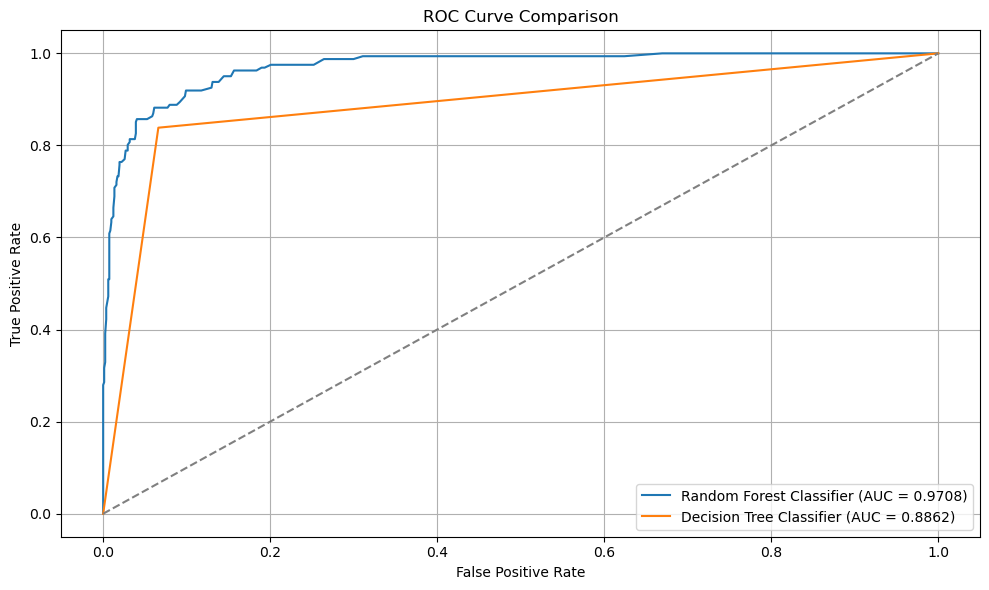

In [122]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(
            n_estimators=200,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='log2',
            max_depth=None,
            criterion='entropy'
        )
    },
    {
        'label': "Decision Tree Classifier",
        'model': DecisionTreeClassifier(
            splitter='best',
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=None,
            max_depth=30,
            criterion='gini'
        )
    }
]

plt.figure(figsize=(10, 6))

for algo in auc_models:
    model = algo['model']
    label = algo['label']
    
    model.fit(X_train, y_train)
    
    # Predict probabilities for positive class (1)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Get FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_probs)
    
    # Plot
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.4f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Final touches
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(
            n_estimators=200,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='log2',
            max_depth=None,
            criterion='entropy'
        )
    },
    {
        'label': "Decision Tree Classifier",
        'model': DecisionTreeClassifier(
            splitter='best',
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=None,
            max_depth=30,
            criterion='gini'
        )
    }
]

plt.figure(figsize=(10, 6))

for algo in auc_models:
    model = algo['model']
    label = algo['label']
    
    model.fit(X_train, y_train)
    
    # Predict probabilities for positive class (1)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Get FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_probs)
    
    # Plot
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.4f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Final touches
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
